# Lab 5

## Exercise 1: Calculating Distances with Functions

- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiple pairs of coordinates.

In [15]:
from math import radians, sin, cos, sqrt, atan2

In [16]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = (
        sin(dlat / 2) ** 2
        + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    )
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance


# Example usage
distance = haversine(38.6885, 19.6967, 30.0522, -18.2437)
print(f"Distance: {distance:.2f} km")

Distance: 3584.36 km


## Exercise 2: Batch Distance Calculation

- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [17]:
from math import radians, sin, cos, sqrt, atan2

In [18]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = (
        sin(dlat / 2) ** 2
        + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    )
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

lima = (-12.0464, -77.0428)
cusco = (-13.5319, -71.9675)
tarapoto = (-6.4833, -76.3667)
iquitos = (-3.7491, -73.2538)

distance_lima_cusco = haversine(*lima, *cusco)
distance_cusco_tarapoto = haversine(*cusco, *tarapoto)
distance_tarapoto_iquitos = haversine(*tarapoto, *iquitos)

# 3 examples of distance calculation
print(f"Distance Lima → Cusco: {distance_lima_cusco:.2f} km")
print(f"Distance Cusco → Tarapoto: {distance_cusco_tarapoto:.2f} km")
print(f"Distance Tarapoto → Iquitos: {distance_tarapoto_iquitos:.2f} km")

Distance Lima → Cusco: 574.58 km
Distance Cusco → Tarapoto: 919.80 km
Distance Tarapoto → Iquitos: 459.64 km


## Exercise 3: Creating and Using a Point Class

- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [19]:
class Point:
    def __init__(self, latitude, longitude, name=None):
        self.latitude = latitude
        self.longitude = longitude
        self.name = name

    def __str__(self):
        return f"{self.name or 'Point'} ({self.latitude}, {self.longitude})"


# define a point in lima 
lima = Point(-12.0464, -77.0428, "lima")
print(lima)

lima (-12.0464, -77.0428)


In [20]:
class Point:
    def __init__(self, latitude, longitude, name=None):
        self.latitude = latitude
        self.longitude = longitude
        self.name = name

    def distance_to(self, other_point):
        return haversine(
            self.latitude, self.longitude, other_point.latitude, other_point.longitude
        )



lima = Point(-12.0464, -77.0428, "lima")
cusco = Point(-13.5319, -71.9675, "cusco")
print(
    f"Distance from {lima.name} to {cusco.name}: {lima.distance_to(cusco):.2f} km"
)

Distance from lima to cusco: 574.58 km


## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [21]:

sample_data = """-12.0464,-77.0428
-13.532,-71.9675
-3.766,-73.2538"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

Sample file 'coordinates.txt' has been created successfully.


In [22]:
def read_coordinates(file_path):
    """Reads coordinates from a file and returns a list of (latitude, longitude) tuples."""
    coordinates = []
    try:
        with open(file_path, "r") as file:
            for line in file:
                try:
                    lat, lon = map(float, line.strip().split(","))  
                    coordinates.append((lat, lon))  
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")  
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    
    return coordinates  

def write_coordinates(file_path, coordinates):
    """Writes a list of coordinates to a file."""
    try:
        with open(file_path, "w") as file:
            for lat, lon in coordinates:
                file.write(f"Latitude: {lat}, Longitude: {lon}\n")
        print(f"Coordinates successfully written to {file_path}")
    except Exception as e:
        print(f"Error writing to file: {e}")



input_file = "coordinates.txt"
output_file = "output_coordinates.txt"

coords = read_coordinates(input_file)  
print(coords) 

if coords: 
    write_coordinates(output_file, coords)


[(-12.0464, -77.0428), (-13.532, -71.9675), (-3.766, -73.2538)]
Coordinates successfully written to output_coordinates.txt


## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [23]:
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

Sample file 'coordinates.txt' has been created successfully.


In [24]:
!pip install geopy


In [25]:
from geopy.distance import geodesic

class Point:
    """Represents a geographic point with latitude and longitude."""
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

    def get_coordinates(self):
        return (self.latitude, self.longitude)

def read_points(file_path):
    """Reads a file with coordinates and returns a list of Point objects."""
    points = []
    try:
        with open(file_path, "r") as file:
            for line in file:
                try:
                    lat, lon = map(float, line.strip().split(","))
                    points.append(Point(lat, lon))
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    
    return points

def calculate_distances(points, output_file):
    """Calculates distances between consecutive points and writes results to a file."""
    try:
        with open(output_file, "w") as file:
            for i in range(len(points) - 1):
                point1 = points[i].get_coordinates()
                point2 = points[i + 1].get_coordinates()
                distance = geodesic(point1, point2).kilometers
                file.write(f"Distance between {point1} and {point2}: {distance:.2f} km\n")
        print(f"Distances successfully written to {output_file}")
    except Exception as e:
        print(f"Error writing to file: {e}")

# Example usage:
input_file = "coordinates.txt"
output_file = "distances.txt"

points = read_points(input_file)  # Read coordinates as Point objects
if points:  
    calculate_distances(points, output_file)  # Calculate and save distances


Distances successfully written to distances.txt


## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [26]:
from geopy.distance import geodesic

def parse_coordinates(line):
    try:
        lat, lon = line.strip().split(",")
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    except ValueError as e:
        print(f"Error: {e}. Could not parse line: {line.strip()}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

def batch_distance_calculation(coordinate_lines, reference_point):
    distances = []
    for line in coordinate_lines:
        coords = parse_coordinates(line)
        if coords:  # this is a valid coodinate 
            try:
                distance = geodesic(reference_point, coords).kilometers
                distances.append(distance)
            except Exception as e:
                print(f"Error calculating distance for {coords}: {e}")
                continue  # this is a valid coordinate
    return distances


reference_point = (10.0, 20.0)  
coordinate_lines = [
    "10.5,20.5",
    "invalid data",
    "11.0,21.0"
]

distances = batch_distance_calculation(coordinate_lines, reference_point)
print("Calculated distances:", distances)


Error: not enough values to unpack (expected 2, got 1). Could not parse line: invalid data
Calculated distances: [77.84047436934868, 155.62020173844135]


## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [27]:
import numpy as np

In [28]:
# Creating a 1D array
arr_1d = np.array([1, 2, 3, 4, 5])
print(f"1D Array: {arr_1d}")

1D Array: [1 2 3 4 5]


In [29]:
cities = np.array([
    [35.6895, 139.6917],  # Tokyo
    [40.7128, -74.0060],  # New York
    [51.5074, -0.1278],   # London
    [48.8566, 2.3522]     # Paris
])

In [30]:
cities_radius = np.array (cities)
print(cities_radius)

[[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]


In [31]:
tokio_radius = cities_radius[0]
diferencia = cities_radius - tokio_radius

In [32]:
print("cities in radians : /n" , cities_radius)
print("/nElement-wise difference from Tokyo:/n", diferencia)

cities in radians : /n [[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]
/nElement-wise difference from Tokyo:/n [[   0.        0.    ]
 [   5.0233 -213.6977]
 [  15.8179 -139.8195]
 [  13.1671 -137.3395]]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [33]:
import pandas as pd

In [34]:
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)


In [35]:
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


In [36]:
print("/nMissing values:/n", df.isnull().sum())
print(df.isnull().sum())

/nMissing values:/n id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64
id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64


In [37]:
df_large_cities = df[df["population"]>10**6]

In [38]:
country_population = df_large_cities.groupby("country")["population"].sum().reset_index()

In [39]:
top_cities= df_large_cities.sort_values("population", ascending=False).head(10)

In [40]:
print("/nTop 10 Largest cities:/n", top_cities)
print(top_cities[['name', 'country', 'population']])


/nTop 10 Largest cities:/n         id          name country  latitude  longitude  population
1239  1240         Tokyo     JPN  35.68502  139.75141    35676000
1224  1225      New York     USA  40.74998  -73.98002    19040000
1230  1231   Mexico City     MEX  19.44244  -99.13099    19028000
1240  1241        Mumbai     IND  19.01699   72.85699    18978000
1245  1246     Sao Paulo     BRA -23.55868  -46.62502    18845000
1148  1149         Delhi     IND  28.66999   77.23000    15926000
1238  1239      Shanghai     CHN  31.21645  121.43650    14987000
1243  1244       Kolkata     IND  22.49497   88.32468    14787000
1175  1176         Dhaka     BGD  23.72306   90.40858    12797394
1217  1218  Buenos Aires     ARG -34.60250  -58.39753    12795000
              name country  population
1239         Tokyo     JPN    35676000
1224      New York     USA    19040000
1230   Mexico City     MEX    19028000
1240        Mumbai     IND    18978000
1245     Sao Paulo     BRA    18845000
1148         

In [41]:
print("\nTotal population per country (only considering cities > 1M):")
print(country_population.sort_values(by="population", ascending=False).head(10))


Total population per country (only considering cities > 1M):
    country  population
18      CHN   203615000
102     USA   134565743
46      IND   134458000
14      BRA    71900406
53      JPN    61636000
64      MEX    33318000
82      RUS    25533000
72      PAK    24504000
45      IDN    20886000
69      NGA    20462000


In [42]:
# Filtering rows based on a condition
df_head = df[df["population"] > 1000000]
df_head

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

In [43]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [45]:
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)

In [46]:
df = pd.DataFrame(gdf.drop(columns="geometry"))

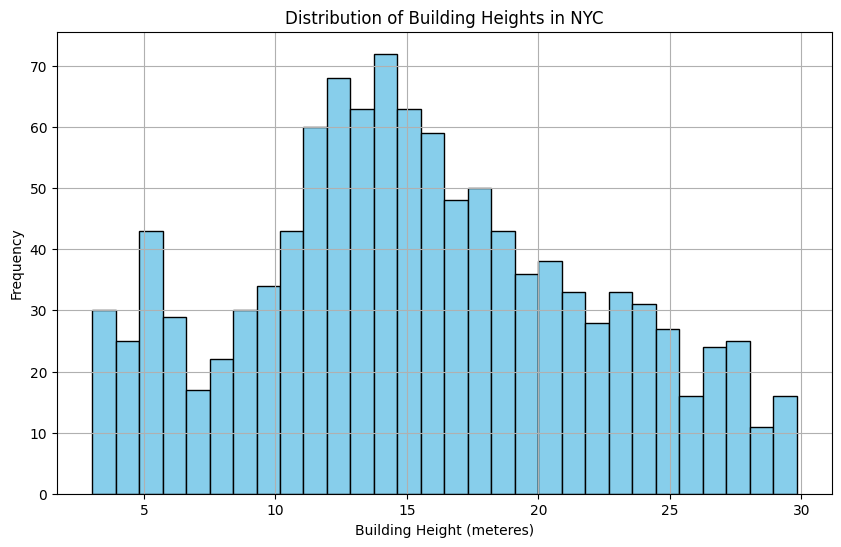

In [47]:
plt.figure(figsize=(10,6))
df['height_MS'].plot(kind='hist',bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Building Height (meteres)")
plt.ylabel("Frequency")
plt.title("Distribution of Building Heights in NYC")
plt.grid(True)
plt.show()


In [48]:
avg_height = df['height_MS'].mean()
print(f"/nAverage building height: {avg_height:.2f} meters")

/nAverage building height: 15.45 meters


In [49]:
output_file ="nyc_taller_buildings.geojson"
taller_buildings = gdf[gdf['height_MS']>avg_height]
print(f"/nTaller buildings saved to '{output_file}'")

/nTaller buildings saved to 'nyc_taller_buildings.geojson'


## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [50]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [51]:
data_url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(data_url)

In [52]:
df_filtered = df[(df['latitude'] >= -40) & (df['latitude'] <= 60)]

In [53]:
df_filtered['geometry'] = df_filtered.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df_filtered, geometry='geometry', crs='EPSG:4326')

C:\Users\Mercedes\AppData\Local\Temp\ipykernel_9404\2326892045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['geometry'] = df_filtered.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


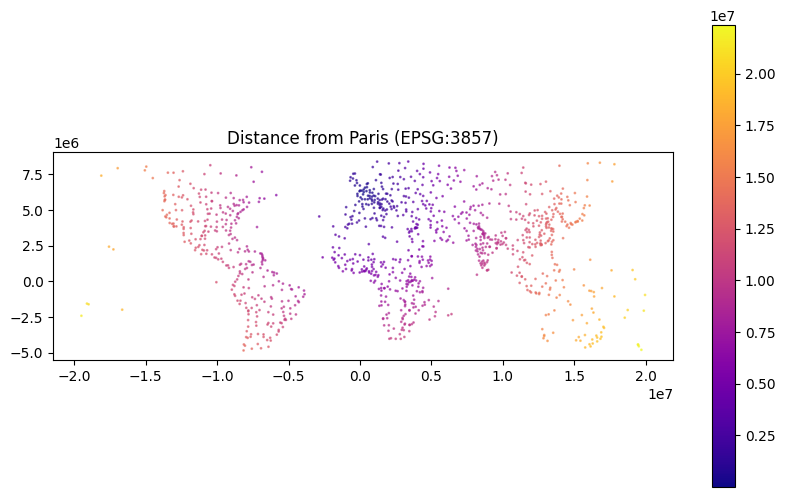

In [54]:

gdf_mercator = gdf.to_crs(epsg=3857)


paris_coords = gpd.GeoSeries([Point(2.3522, 48.8566)], crs='EPSG:4326').to_crs(epsg=3857).iloc[0]


gdf_mercator['distance_to_paris'] = gdf_mercator.geometry.apply(lambda x: x.distance(paris_coords))


fig, ax = plt.subplots(figsize=(10, 6))
gdf_mercator.plot(column='distance_to_paris', cmap='plasma', legend=True, markersize=1, alpha=0.6, ax=ax)
ax.set_title("Distance from Paris (EPSG:3857)")
plt.show()

## Submission Requirements

Complete the exercises above and and upload the notebook to your GitHub repository. Make sure the notebook has a Colab badge at the top so that it can be easily opened in Google Colab. Submit the URL of the notebook to Canvas.